In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

sns.set_style("whitegrid")

In [2]:
dict_cellline_to_msi = {
    # Colon/Colorectal cancer
 'CCK81_LARGE_INTESTINE': 'MSI',
 'HCC56_LARGE_INTESTINE': 'MSS',
 'HT55_LARGE_INTESTINE': 'MSS',
 'LS180_LARGE_INTESTINE': 'MSI',
 'LS1034_LARGE_INTESTINE': 'MSS',
 'NCIH747_LARGE_INTESTINE': 'MSS', # MSI-L
 'OUMS23_LARGE_INTESTINE': 'MSS',
 'RCM1_LARGE_INTESTINE': 'MSS',
 'SNUC4_LARGE_INTESTINE' : 'MSI',
 'CL34_LARGE_INTESTINE' : 'MSI', # https://www.nature.com/articles/ncomms8002#MOESM559

    # Endometrial cancer
 'EFE184_ENDOMETRIUM' : 'MSS', # https://pmc.ncbi.nlm.nih.gov/articles/PMC3016101/
 'HEC108_ENDOMETRIUM' : 'MSI',
 'HEC151_ENDOMETRIUM' : 'MSI',
 'HEC251_ENDOMETRIUM' : 'MSS', # POLE, https://pmc.ncbi.nlm.nih.gov/articles/PMC9322587/
 'HEC59_ENDOMETRIUM' : 'MSI',
 'HEC6_ENDOMETRIUM' : 'MSI',
 'MFE280_ENDOMETRIUM' : 'MSS',
 'MFE319_ENDOMETRIUM' : 'MSI',
 'SNU1077_ENDOMETRIUM' : 'N/A',
 'TEN_ENDOMETRIUM' : 'N/A',


   # Gastric cancer
 '2313287_STOMACH' : 'MSI',
 'IM95_STOMACH' : 'MSI', # https://pmc.ncbi.nlm.nih.gov/articles/PMC9022268/
 'LMSU_STOMACH': 'N/A',
 'MKN45_STOMACH' : 'MSS',
 'MKN7_STOMACH': 'MSS', # https://www.nature.com/articles/3700117
 'SH10TC_STOMACH' : 'MSS', # Not surely MSS, but likely to be MSS https://pmc.ncbi.nlm.nih.gov/articles/PMC8694418/#sec012
 
   # Pancreatic cancer
 'ASPC1_PANCREAS' : 'MSS',
 'HUPT3_PANCREAS' : 'MSS',
 'HUPT4_PANCREAS' : 'MSS',
 'PANC1_PANCREAS' : 'N/A',
 'SW1990_PANCREAS': 'MSS',
 'DANG_PANCREAS': 'MSS',
 'PK59_PANCREAS': 'N/A',
 'PANC0203_PANCREAS': 'MSS',
 'PATU8988S_PANCREAS': 'N/A',
 'PK45H_PANCREAS': 'N/A',
 'SU8686_PANCREAS' : 'MSS',
 
  # Lung cancer
 'NCIH727_LUNG': 'MSS',
 'NCIH2077_LUNG': 'N/A',
 'NCIH2087_LUNG': 'MSS',
 'NCIH1568_LUNG': 'MSS',
 'NCIH1048_LUNG': 'MSI', # MSI-H
 'NCIH1944_LUNG': 'MSS',
 'NCIH358_LUNG': 'MSS',
 'NCIH522_LUNG': 'MSS',
 'NCIH1792_LUNG': 'MSS',
 'CALU6_LUNG': 'MSS',

 'KPL1_BREAST': 'MSS',
 'MSTO211H_PLEURA': 'MSS',

 'SKMEL30_SKIN': 'MSS',
 'HS939T_SKIN': 'MSS',
 'HUH6_LIVER': 'N/A',
 'GOS3_CENTRAL_NERVOUS_SYSTEM': 'N/A',
 'KYSE520_OESOPHAGUS': 'MSS',
 'ZR751_BREAST': 'N/A',
 'VMRCRCZ_KIDNEY': 'MSS',
 'HS852T_SKIN': 'N/A',
 'T47D_BREAST': 'MSS',
 'COLO792_SKIN': 'MSS',
 'HCC1419_BREAST': 'MSS',
 'TOV21G_OVARY': 'MSI', # MSI-H
 'HS729_SOFT_TISSUE': 'N/A',
 'TE6_OESOPHAGUS': 'MSS',
 'SNU738_CENTRAL_NERVOUS_SYSTEM': 'N/A',
 'OVTOKO_OVARY': 'MSS',
 'RD_SOFT_TISSUE': 'MSS',
 'PC3_PROSTATE': 'MSS',
 'TCCSUP_URINARY_TRACT': 'MSS',
 'OVSAHO_OVARY': 'N/A',
 'SNU423_LIVER': 'MSS',
 'JHOS2_OVARY': 'MSS',
 'EFM192A_BREAST': 'MSS',
 'RVH421_SKIN': 'MSS',
 'KMRC3_KIDNEY': 'N/A',
 'TE1_OESOPHAGUS': 'MSS',
 }

In [3]:
def saveWithPickle(obj, PATH_out, filename="saveWithPickle"):
    import pickle
    with open(f'{PATH_out}/{filename}.pickle', 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def loadFromPickle(dir_pickle):
    import pickle
    with open(dir_pickle, 'rb') as handle:
        unserialized_pickle = pickle.load(handle)
    return unserialized_pickle

## All cell lines

## MSI-prevalent cancers

### Re-process using Scanpy

In [27]:
adata = sc.read_h5ad('/Volumes/1TB_M.2/datasets/data/public/processed_data/Kinker_et_al/CPM_data.scanpy_preprocessed.CRC-GC-EC.h5ad')
adata = adata.raw.to_adata()

In [30]:
adata.var.index = adata.var['GENE']
adata.var.index.name = None

In [33]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="PoolID")

adata.raw = adata.copy()
adata = adata[:, adata.var.highly_variable]

sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")

/Users/18parkky/miniforge3/envs/cpdb/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [34]:
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=40) # neighbor set to 5 to clutter cells as closely as possible
sc.tl.umap(adata, random_state=42, spread=0.2)  # spread set to 0.2 to clutter cells as closely as possible

/Users/18parkky/miniforge3/envs/cpdb/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/18parkky/miniforge3/envs/cpdb/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/18parkky/miniforge3/envs/cpdb/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


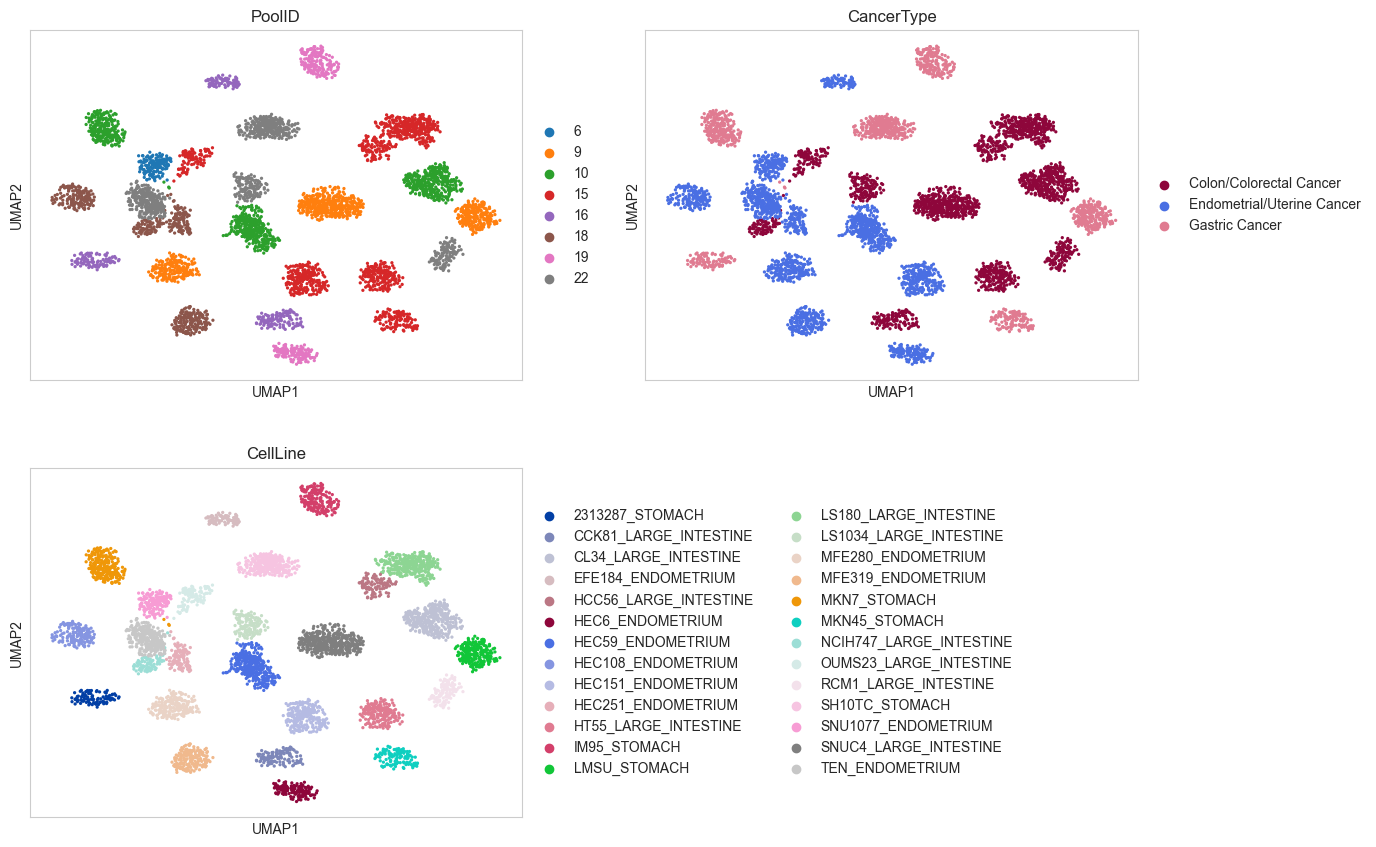

In [7]:
sc.pl.umap(adata, color=['PoolID', 'CancerType', 'CellLine'], ncols=2)

### Load and overlay NanoMnT results

In [52]:
AlleleTable = pd.read_csv('/Volumes/1TB_M.2/datasets/data/public/processed_data/Kinker_et_al/AlleleTable.merged.tsv.gz', sep='\t')
AlleleTable.rename( {'read_STR_length' : 'read_STR_allele'}, axis=1, inplace=True )
AlleleTable['PoolID'] = [ str(pi.split('_')[1]) for pi in AlleleTable['pool_id'] ]

#### Filter out low-quality STR reads

In [53]:
orig_length = AlleleTable.shape[0]

In [54]:
### 1. Filter out low-quality flankings (e.g., indels within flankings)        
col_flanking_quality = list()
for tup2 in AlleleTable.itertuples():
    bf = f'{tup2.left_flanking_seq}{tup2.right_flanking_seq}'
    if '*' in bf:
        col_flanking_quality.append( 'Poor' )
    elif bf.upper() != bf:
        col_flanking_quality.append( 'Poor' )
    else:
        col_flanking_quality.append( 'Good' )
AlleleTable['flanking_quality'] = col_flanking_quality
AlleleTable = AlleleTable[(AlleleTable['flanking_quality']=='Good')].copy()
print(f'{round(100*len(AlleleTable)/orig_length, 2)} %')        

### 2. Filter out G/C repeats
AlleleTable = AlleleTable[(AlleleTable['repeat_unit'].isin(['A', 'T']))].copy()
print(f'{round(100*len(AlleleTable)/orig_length, 2)} %')        

### 3. Filter out reads without CB or UMI
AlleleTable.dropna(inplace=True,)
AlleleTable = AlleleTable[AlleleTable['reference_STR_allele']<=24].copy()
print(f'{round(100*len(AlleleTable)/orig_length, 2)} %')

AlleleTable['diff'] = AlleleTable['read_STR_allele'] - AlleleTable['reference_STR_allele']

89.3 %
88.65 %
84.85 %


In [56]:
AlleleTable.to_csv('/Volumes/1TB_M.2/datasets/data/public/processed_data/Kinker_et_al/AlleleTable.merged.preprocessed.tsv.gz', sep='\t', compression='gzip')

In [8]:
AlleleTable = pd.read_csv('/Volumes/1TB_M.2/datasets/data/public/processed_data/Kinker_et_al/AlleleTable.merged.preprocessed.tsv.gz', sep='\t')

#### Overlay results

In [9]:
AlleleTable.reset_index(inplace=True, drop=True)

In [35]:
adata.obs['Identifier'] = [ f'{tup.CB.split("-")[0]}-{tup.PoolID}' for tup in adata.obs.itertuples() ]
len(adata.obs), len(set(adata.obs['Identifier']))

(5431, 5431)

In [11]:
AlleleTable['Identifier'] = [ f'{tup.CB.split("-")[0]}-{tup.PoolID}' for tup in AlleleTable.itertuples() ]

In [12]:
dict_Identifier_to_STRprofile = dict()

for Identifier, edf in AlleleTable.groupby("Identifier"):
    edf_o = edf['diff'].dropna()
    if len(edf_o) > 0:
        dict_Identifier_to_STRprofile[Identifier] = [ np.mean(edf_o), np.std(edf_o), len(edf_o) ]

# saveWithPickle(dict_Identifier_to_STRprofile, '/Volumes/1TB_M.2/datasets/data/public/processed_data/Kinker_et_al', 'dict_Identifier_to_STRprofile')

In [13]:
for Identifier in adata.obs['Identifier']:
    try: dict_Identifier_to_STRprofile[Identifier]
    except KeyError: dict_Identifier_to_STRprofile[Identifier]=[0, 0, 0]

In [36]:
adata.obs['AvgSTRDiff'] = [ dict_Identifier_to_STRprofile[Identifier][0] for Identifier in adata.obs['Identifier'] ]
adata.obs['StdSTRDiff'] = [ dict_Identifier_to_STRprofile[Identifier][1] for Identifier in adata.obs['Identifier'] ]
adata.obs['NumSTRLoci'] = [ dict_Identifier_to_STRprofile[Identifier][2] for Identifier in adata.obs['Identifier'] ]

In [37]:
u, s = np.mean( adata.obs['AvgSTRDiff'] ), np.std( adata.obs['AvgSTRDiff'] )
adata.obs['AvgSTRDiff_scaled'] = [ (ASD-u)/s for ASD in adata.obs['AvgSTRDiff'] ]

u, s = np.mean( adata.obs['StdSTRDiff'] ), np.std( adata.obs['StdSTRDiff'] )
adata.obs['StdSTRDiff_scaled'] = [ (ASD-u)/s for ASD in adata.obs['StdSTRDiff'] ]

In [38]:
adata.obs['MSI_status'] = [ dict_cellline_to_msi[CL] for CL in adata.obs['CellLine'] ]

In [39]:
adata.write('/Volumes/1TB_M.2/datasets/data/public/processed_data/Kinker_et_al/CPM_data.scanpy_preprocessed.CRC-GC-EC.NanoMNT_labeled.h5ad')

### Visualize results

/Users/18parkky/miniforge3/envs/cpdb/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/18parkky/miniforge3/envs/cpdb/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


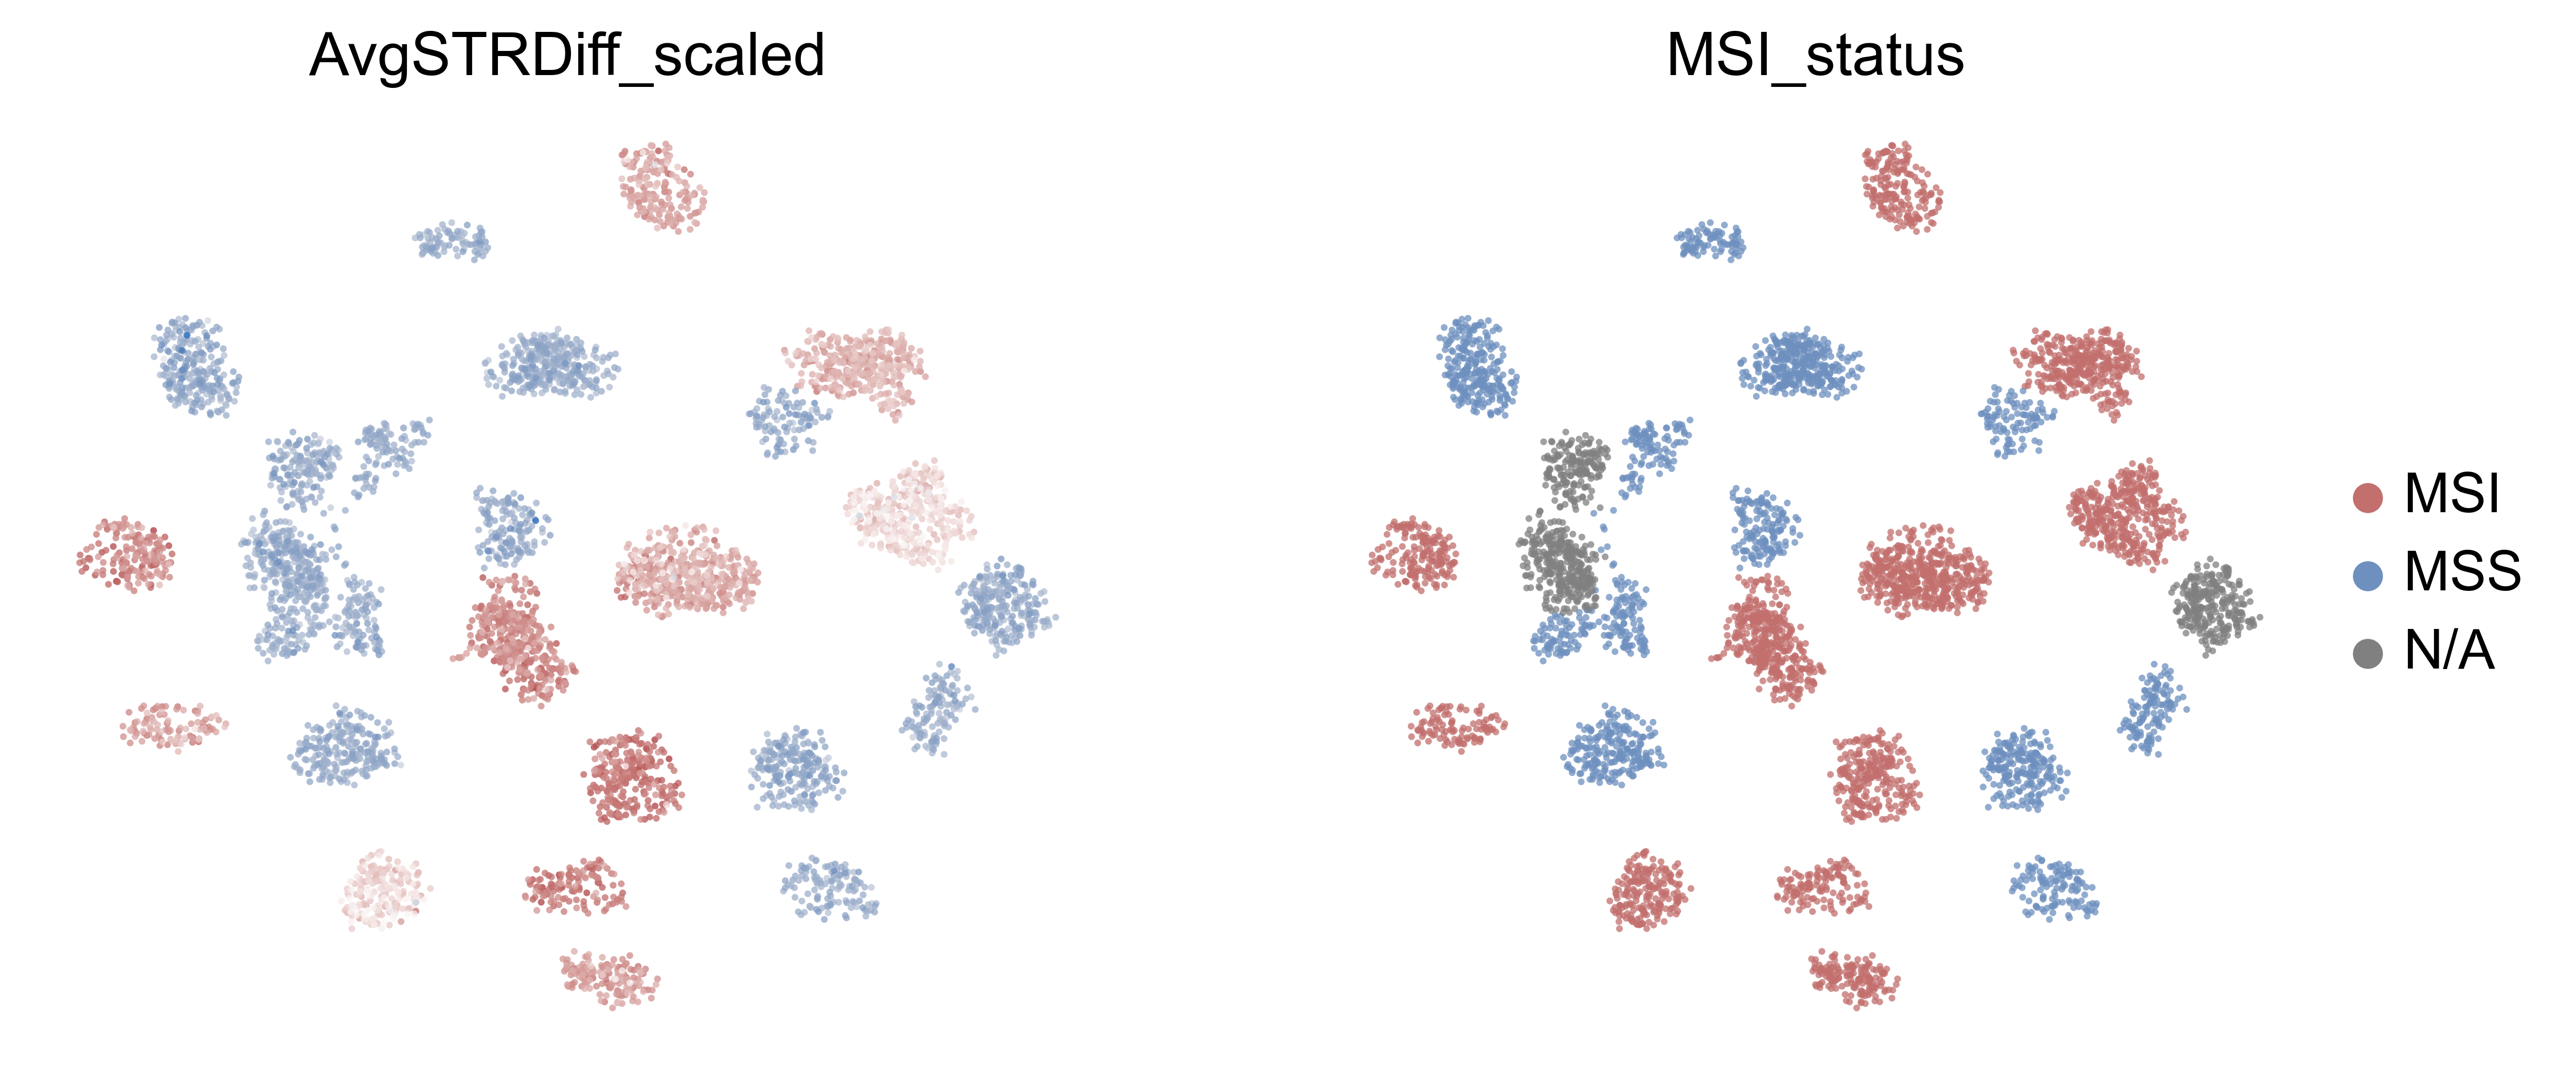

In [167]:
sc.set_figure_params(dpi=300, frameon=False, transparent=False)
sc.pl.umap(adata[(adata.obs['NumSTRLoci']!=0)], color=['AvgSTRDiff_scaled', 'MSI_status',], 
           ncols=2,
           cmap='vlag_r',
           vmin=-2, vmax=2, # -2σ ~ 2σ 
           palette={ 
               'MSI' : sns.color_palette('vlag_r')[0], 
               'MSS' : sns.color_palette('vlag_r')[-1], 
               'N/A' : 'gray'
               },
           colorbar_loc=None,
           alpha=0.75, 
           s=10,
           )

In [17]:
MSIscoreByCellLine = { CellLine : np.mean(edf['AvgSTRDiff_scaled']) for CellLine, edf in adata.obs.groupby('CellLine') }
# adata.obs['MSI_score'] = [ MSIscoreByCellLine[CL] for CL in adata.obs['CellLine'] ]  

<Axes: xlabel='StdSTRDiff_scaled', ylabel='CellLine'>

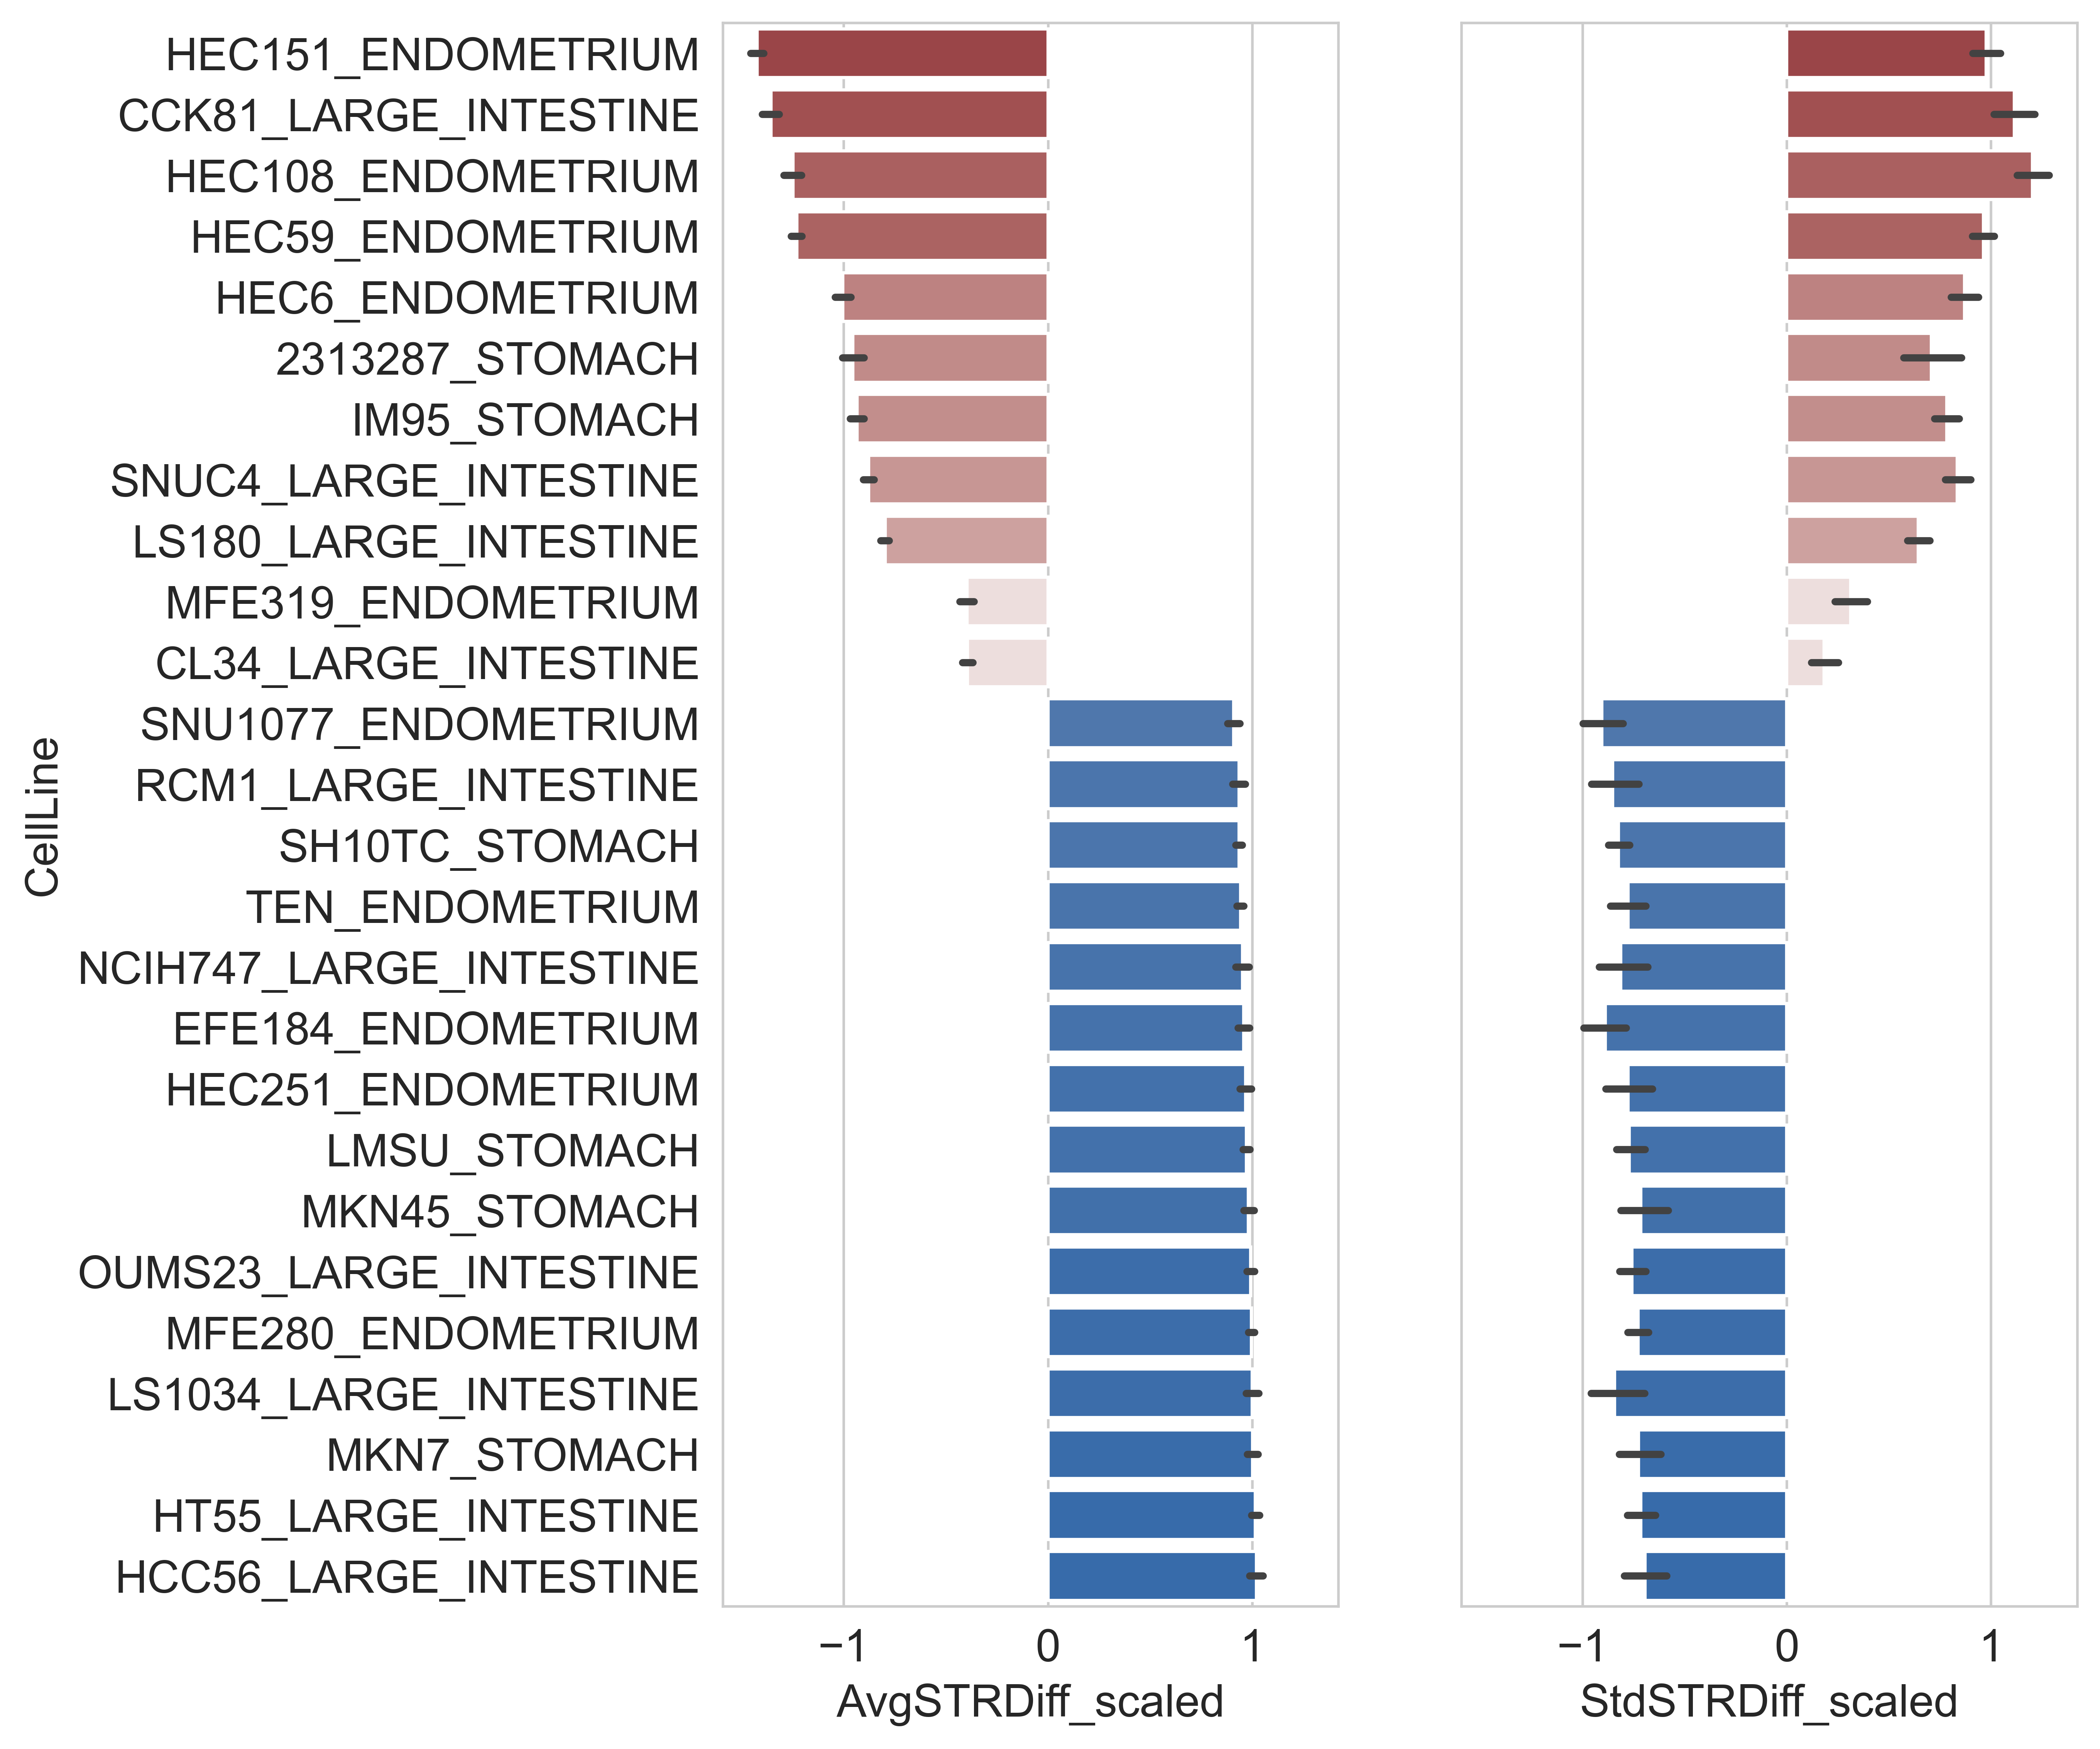

In [195]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 9), sharex=True, sharey=True)
OrderByMSIIntensity = adata.obs.groupby(['CellLine'])['AvgSTRDiff_scaled'].aggregate(np.mean).reset_index().sort_values('AvgSTRDiff_scaled')
sns.barplot(data=adata.obs, 
            y='CellLine', 
            x='AvgSTRDiff_scaled', 
            order=OrderByMSIIntensity['CellLine'],
            hue='MSI_score', palette=sns.color_palette('vlag_r', as_cmap=True, ),
            legend=None, ax=axes[0]
            )
sns.barplot(data=adata.obs, 
            y='CellLine', 
            x='StdSTRDiff_scaled', 
            order=OrderByMSIIntensity['CellLine'],
            hue='MSI_score', palette=sns.color_palette('vlag_r', as_cmap=True, ),
            legend=None, ax=axes[1]
            )

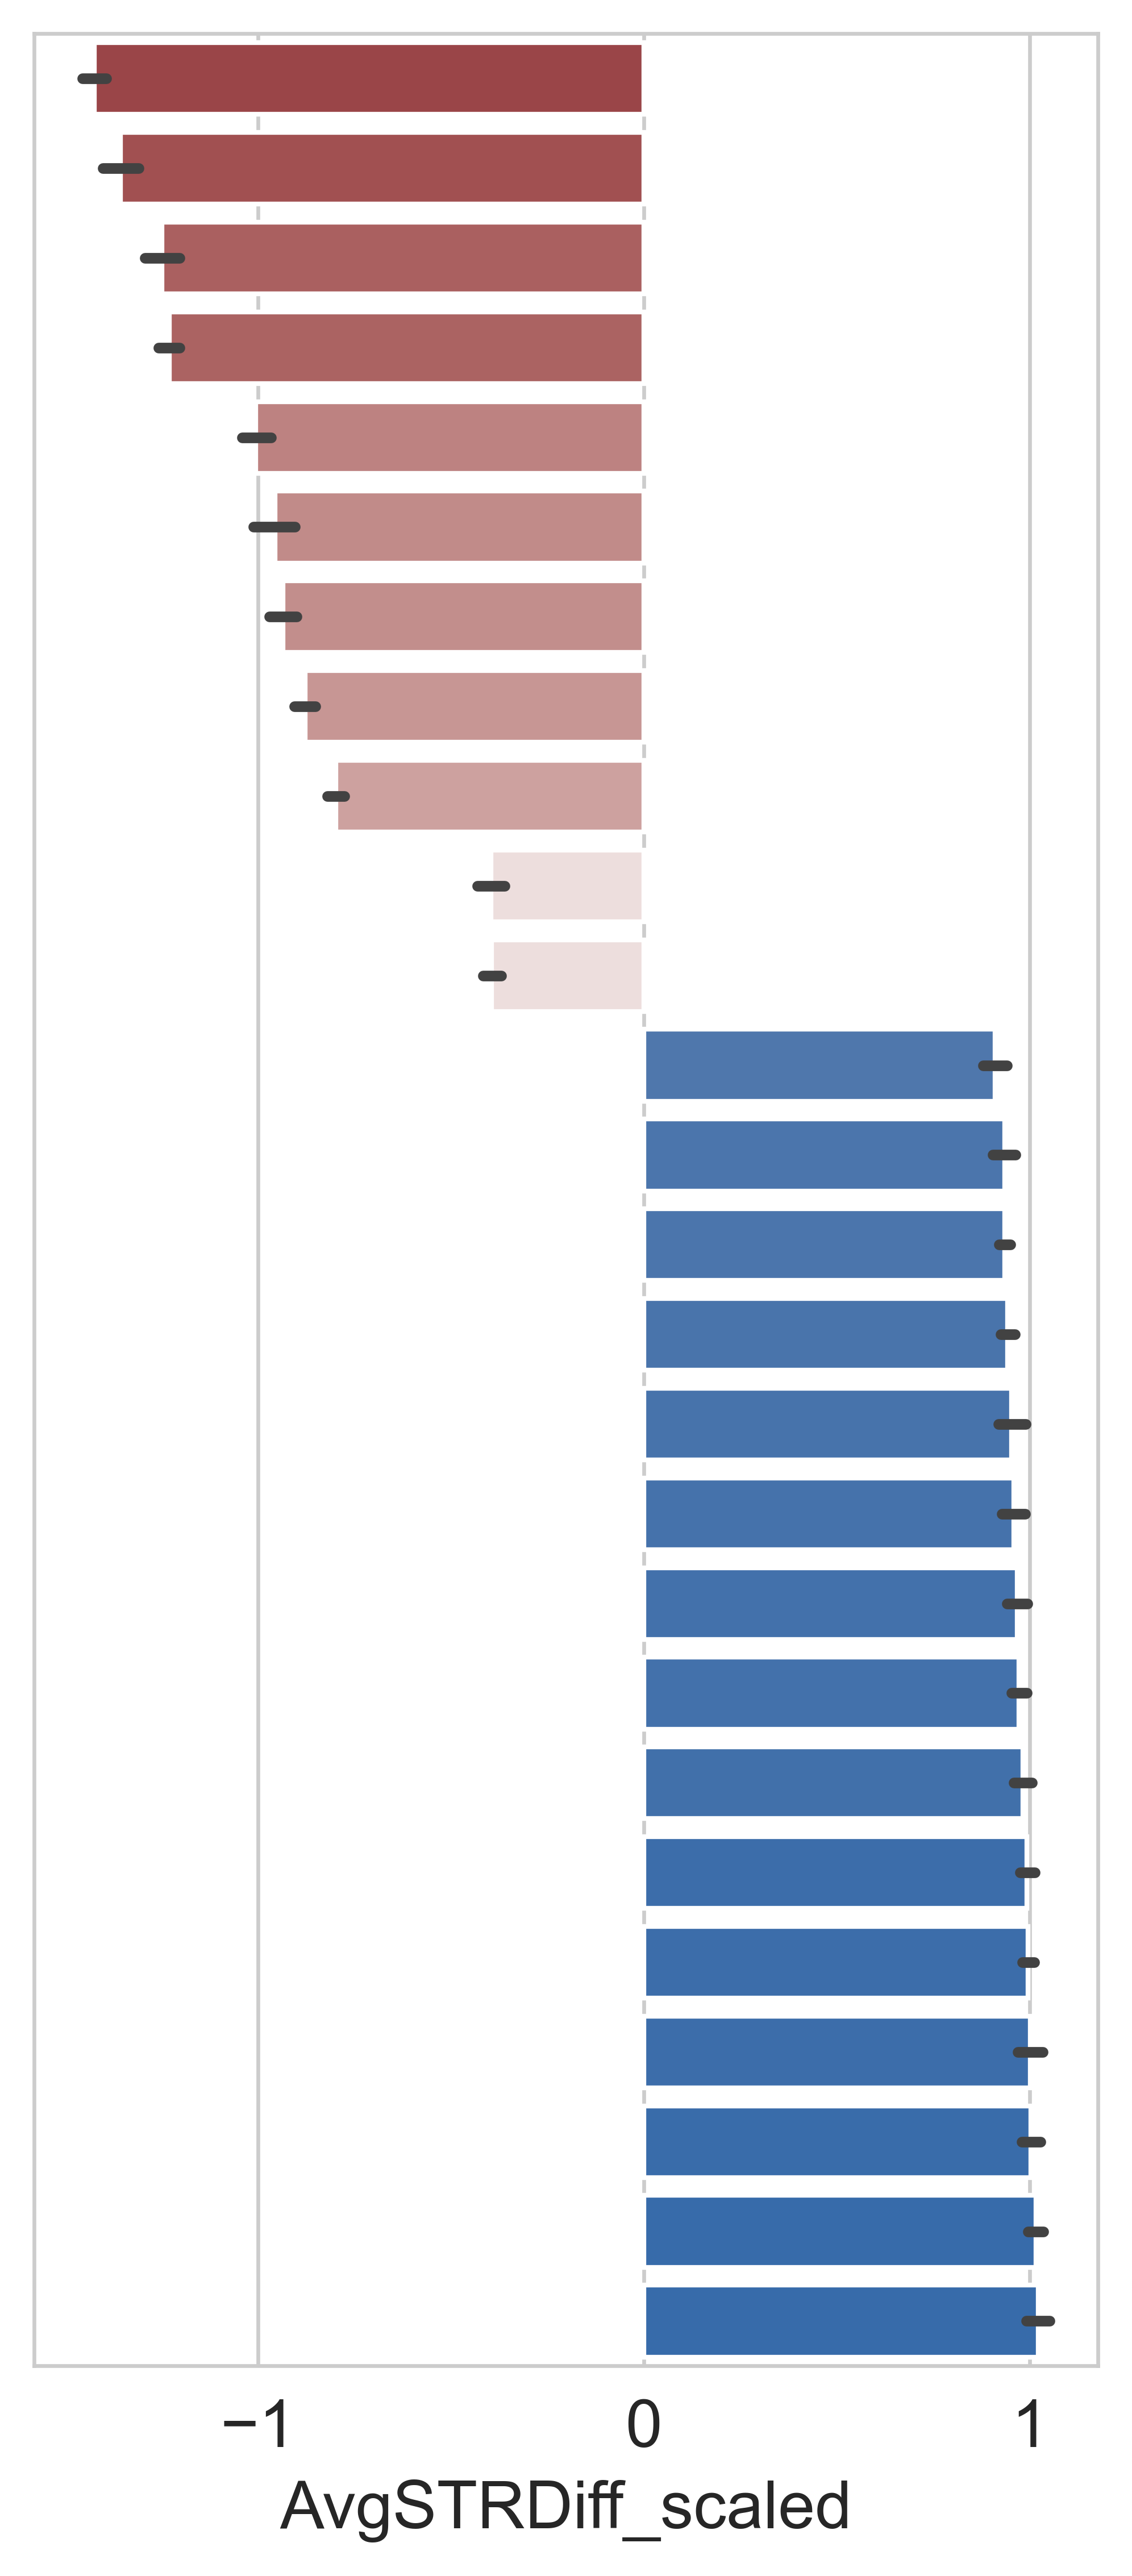

In [192]:
plt.figure(figsize=(4, 9))
OrderByMSIIntensity = adata.obs.groupby(['CellLine'])['AvgSTRDiff_scaled'].aggregate(np.mean).reset_index().sort_values('AvgSTRDiff_scaled')
ax = sns.barplot(data=adata.obs, 
                y='CellLine', 
                x='AvgSTRDiff_scaled', 
                order=OrderByMSIIntensity['CellLine'],
                hue='MSI_score', palette=sns.color_palette('vlag_r', as_cmap=True, ),
                legend=None,)
ax.set_yticklabels([]);
ax.set_ylabel([]);

In [ ]:
        #    palette={ 
        #        'MSI' : sns.color_palette('vlag_r')[0], 
        #        'MSS' : sns.color_palette('vlag_r')[-1], 
        #        'N/A' : 'gray'
        #        },

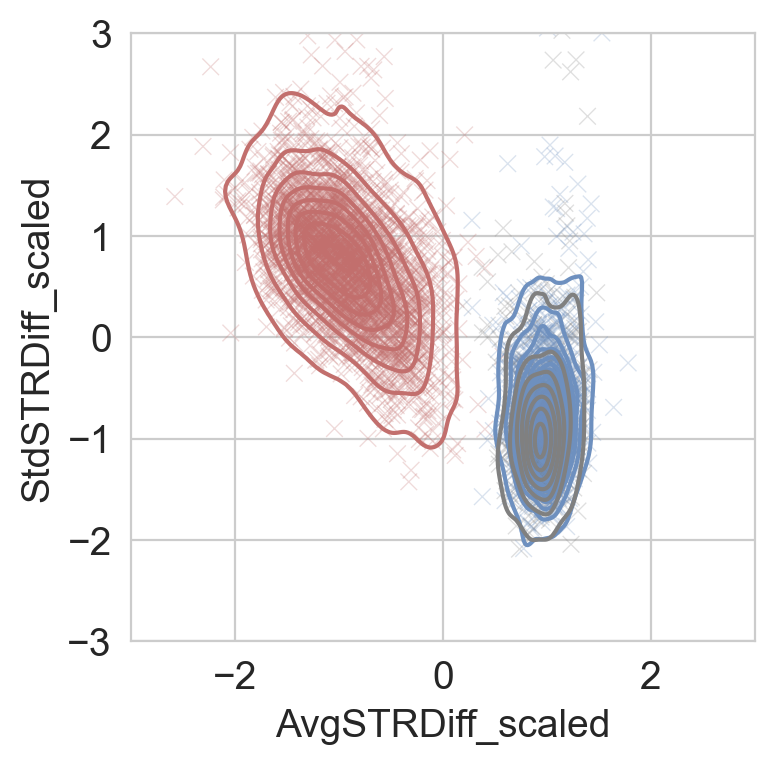

In [226]:
plt.figure(figsize=(4, 4), dpi=100)

ax = sns.kdeplot(data=adata.obs[adata.obs['NumSTRLoci']>=10], 
                x='AvgSTRDiff_scaled', 
                y='StdSTRDiff_scaled', 
                palette={ 
                    'MSI' : sns.color_palette('vlag_r')[0], 
                    'MSS' : sns.color_palette('vlag_r')[-1], 
                    'N/A' : 'gray'
                    }, 
                hue='MSI_status', 
                legend=None,
                )
ax = sns.scatterplot(data=adata.obs[adata.obs['NumSTRLoci']>=10], 
                x='AvgSTRDiff_scaled', 
                y='StdSTRDiff_scaled', 
                palette={ 
                    'MSI' : sns.color_palette('vlag_r')[0], 
                    'MSS' : sns.color_palette('vlag_r')[-1], 
                    'N/A' : 'gray'
                    }, 
                    marker='x',
                alpha=0.25, hue='MSI_status', 
                legend=None,
                )
ax.set_xlim([-3, 3]);
ax.set_ylim([-3, 3]);

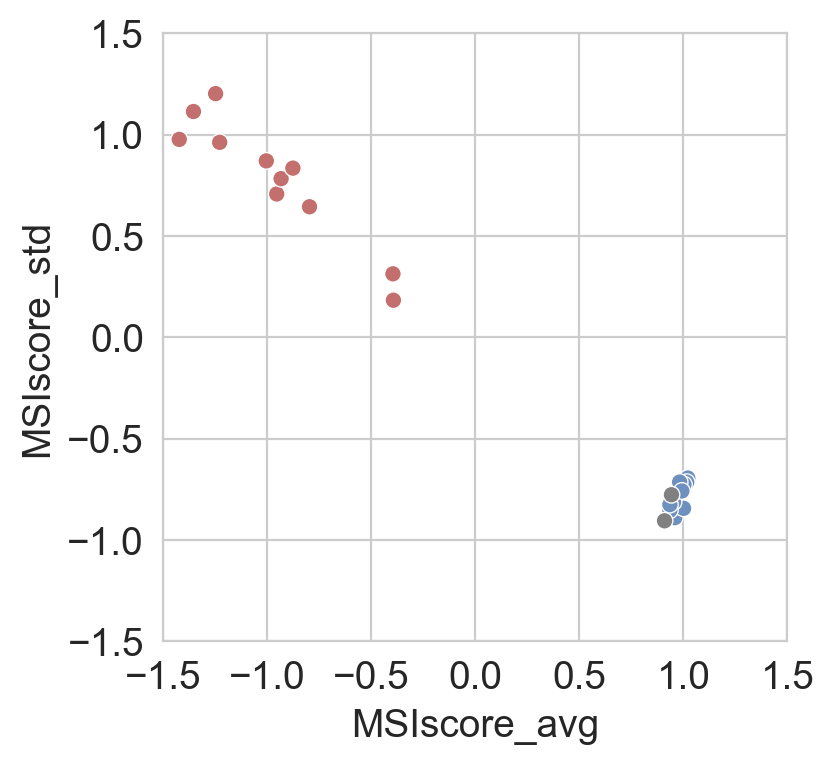

In [213]:
MSI_score_by_CellLine = list()
for CellLine, edf in adata.obs.groupby('CellLine'):
    MSI_score_by_CellLine.append( [CellLine, edf.iloc[0].MSI_status, np.mean(edf['AvgSTRDiff_scaled']), np.mean(edf['StdSTRDiff_scaled'])] )
MSI_score_by_CellLine = pd.DataFrame(MSI_score_by_CellLine, columns=['CellLine', 'MSI_status', 'MSIscore_avg', 'MSIscore_std'])

plt.figure(figsize=(4, 4), dpi=100)
ax = sns.scatterplot(data=MSI_score_by_CellLine, 
                x='MSIscore_avg', y='MSIscore_std', hue='MSI_status', 
                palette={ 
                    'MSI' : sns.color_palette('vlag_r')[0], 
                    'MSS' : sns.color_palette('vlag_r')[-1], 
                    'N/A' : 'gray'
                    }, 
                    legend=None,
                )

ax.set_xlim([-1.5, 1.5]);
ax.set_ylim([-1.5, 1.5]);
ax.xaxis.set_major_locator(ticker.MultipleLocator(.5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(.5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

/Users/18parkky/miniforge3/envs/cpdb/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


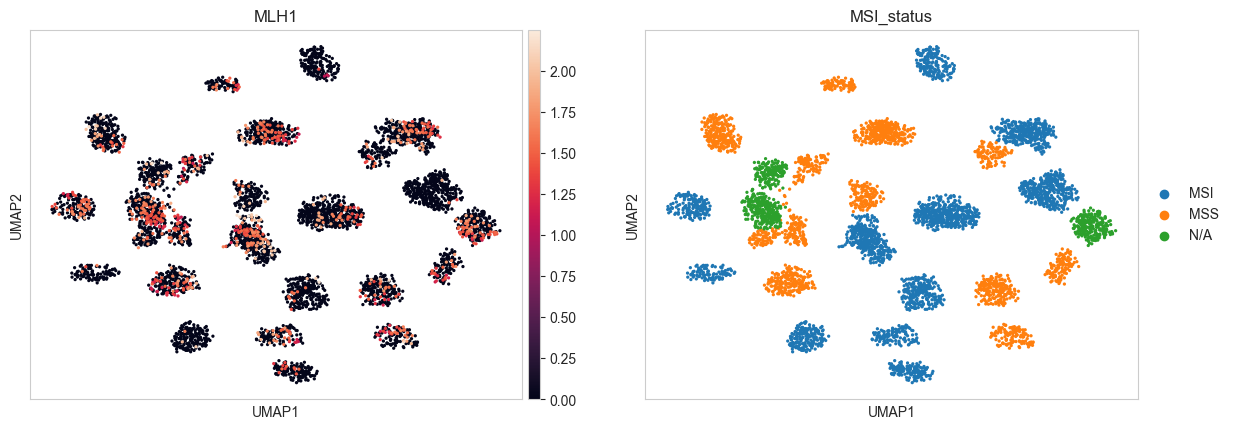

In [41]:
sc.pl.umap(adata, color=['MLH1', 'MSI_status'])

## cMS gene expression

/Users/18parkky/miniforge3/envs/cpdb/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/18parkky/miniforge3/envs/cpdb/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


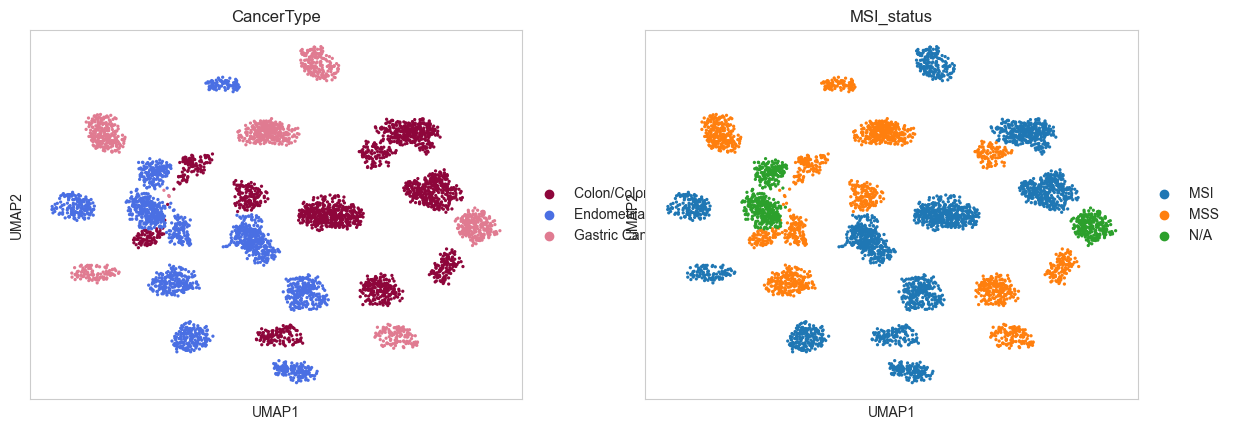

In [120]:
sc.pl.umap(adata, color=['CancerType', 'MSI_status'])

/Users/18parkky/miniforge3/envs/cpdb/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


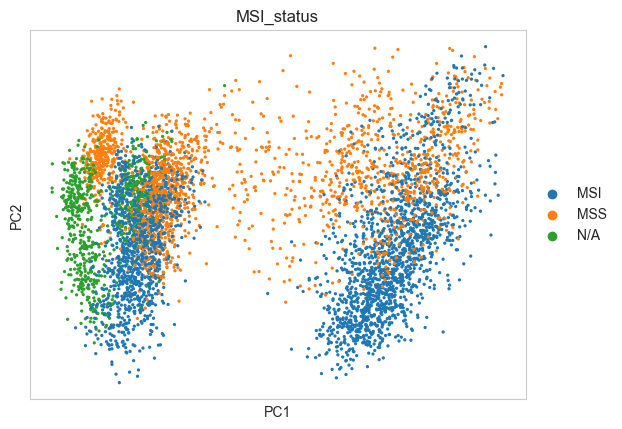

In [119]:
sc.pl.pca(adata, color=['MSI_status'])